
--- General Analysis ---

General Analysis of Yucatán 2010
Total population in Yucatán: 5872504
Male population in Yucatán: 2893312.0
Female population in Yucatán: 2979192.0
Employed population in Yucatán: 2330077.0
Unemployed population in Yucatán: 61756.0
Households with male headship in Yucatán: 1172204.0
Households with female headship in Yucatán: 338941.0
The 2 localities with the highest population in Yucatán are:
1. Entity: YucatÃ¡n, Municipality: Total de la entidad YucatÃ¡n (0), Locality: 0, Population: 1955577

2. Entity: YucatÃ¡n, Municipality: MÃ©rida (50), Locality: 0, Population: 830732


The 2 localities with the lowest population in Yucatán are:

1. Entity: YucatÃ¡n, Municipality: AbalÃ¡ (1), Locality: 9998, Population: 1
2. Entity: YucatÃ¡n, Municipality: Muxupip (54), Locality: 9998, Population: 1


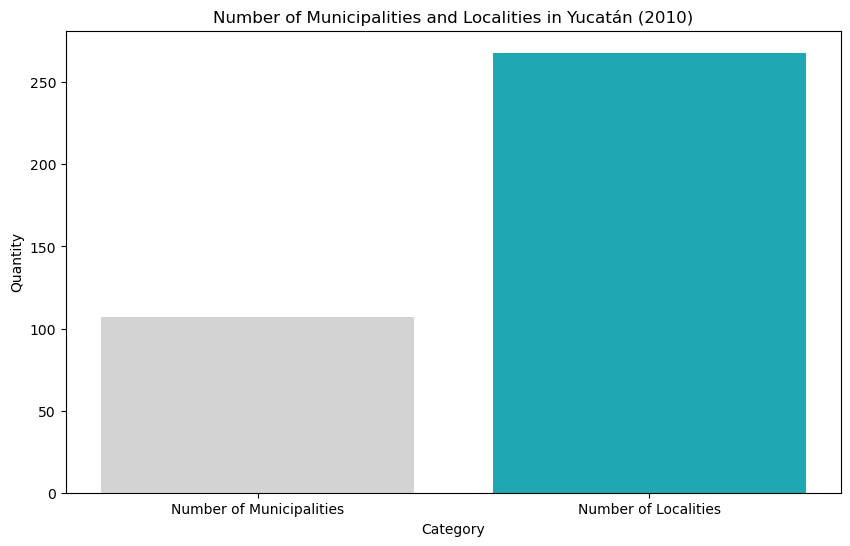

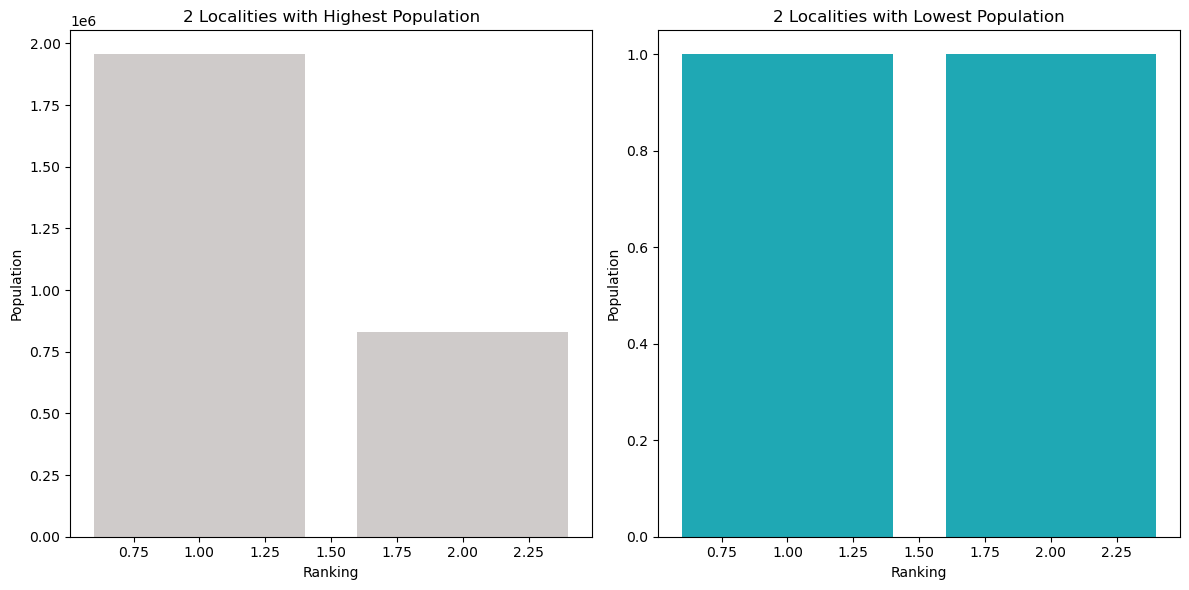

Number of municipalities in Yucatán: 107
Number of localities in Yucatán: 268

--- Filtering of Municipalities (Mérida, Ticul, Progreso) ---

Demographic Analysis of Mérida 2010
Total population in Mérida: 1661464
Male population in Mérida: 802680.0
Female population in Mérida: 858784.0
Employed population in Mérida: 712744.0
Unemployed population in Mérida: 19588.0
Households with male headship in Mérida: 327666.0
Households with female headship in Mérida: 125382.0

Demographic Analysis of Ticul 2010


Total population in Ticul: 3954

Male population in Ticul: 1944.0
Female population in Ticul: 2010.0
Employed population in Ticul: 1094.0
Unemployed population in Ticul: 24.0
Households with male headship in Ticul: 842.0
Households with female headship in Ticul: 246.0

Demographic Analysis of Progreso 2010

Total population in Progreso: 107916
Male population in Progreso: 53850.0
Female population in Progreso: 54066.0
Employed population in Progreso: 44672.0
Unemployed population in Pro

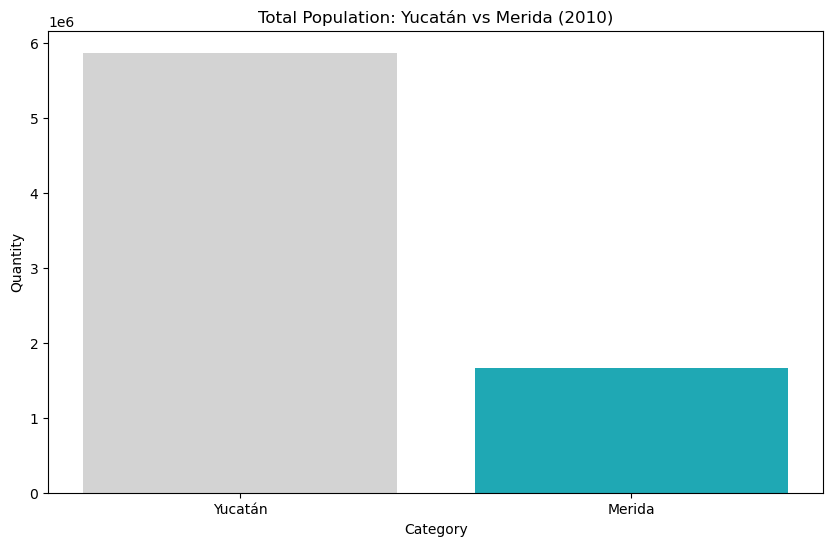

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Load and Clean Data
yucatan_df = pd.read_csv("iter_31_cpv2010.csv", encoding="latin-1", low_memory=False)

# Numeric columns for specific cleaning
cols_num = ["pobtot", "pobmas", "pobfem", "pocupada_m", "pocupada_f", "pdesocup_m", "pdesocup_f", "hogjef_m", "hogjef_f"]

# Replace " " and "*" only in numeric columns
yucatan_df[cols_num] = yucatan_df[cols_num].replace([" ", "*"], np.nan)

# Convert numeric columns to float (to handle NaN)
yucatan_df[cols_num] = yucatan_df[cols_num].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in key numeric columns (adjust subset as needed)
yucatan_df.dropna(subset=cols_num, inplace=True)
yucatan_df = yucatan_df.reset_index(drop=True)
yucatan_df = yucatan_df[["mun", "loc", "nom_ent", "nom_mun", "pobtot", "pobmas", "pobfem", "pocupada_m", "pocupada_f", "pdesocup_m", "pdesocup_f", "hogjef_m", "hogjef_f"]]

def info():
    print(yucatan_df.head(10))
    print(yucatan_df.info())
    print(yucatan_df.isnull().sum())
    print(yucatan_df.describe())  # Added for general summaries

# General Analysis of Yucatán 2010
def analisis_general(yucatan_df):
    print("General Analysis of Yucatán 2010")
    
    try:
        n = int(input("Enter the number of municipalities to analyze (integer): "))
        if n <= 0:
            raise ValueError("The number must be greater than 0")
    except ValueError as e:
        print(f"Error: {e}. Default n=5 will be used.")
        n = 5
    
    # General calculations for Yucatán
    poblacion_total_yuc = yucatan_df["pobtot"].sum()
    poblacion_masculina_yuc = yucatan_df["pobmas"].sum()
    poblacion_femenina_yuc = yucatan_df["pobfem"].sum()
    poblacion_ocupada_yuc = yucatan_df["pocupada_m"].sum() + yucatan_df["pocupada_f"].sum()
    poblacion_desocupada_yuc = yucatan_df["pdesocup_m"].sum() + yucatan_df["pdesocup_f"].sum()
    hogares_jefatura_masculina_yuc = yucatan_df["hogjef_m"].sum()
    hogares_jefatura_femenina_yuc = yucatan_df["hogjef_f"].sum()
    
    print(f"Total population in Yucatán: {poblacion_total_yuc}")
    print(f"Male population in Yucatán: {poblacion_masculina_yuc}")
    print(f"Female population in Yucatán: {poblacion_femenina_yuc}")
    print(f"Employed population in Yucatán: {poblacion_ocupada_yuc}")
    print(f"Unemployed population in Yucatán: {poblacion_desocupada_yuc}")
    print(f"Households with male headship in Yucatán: {hogares_jefatura_masculina_yuc}")
    print(f"Households with female headship in Yucatán: {hogares_jefatura_femenina_yuc}")
    
    # Analysis of municipalities and localities
    numero_municipios = yucatan_df["mun"].nunique()
    numero_localidades = yucatan_df["loc"].nunique()
    
    # Sort once for efficiency
    df_sorted_asc = yucatan_df.sort_values("pobtot", ascending=True)
    df_sorted_desc = yucatan_df.sort_values("pobtot", ascending=False)
    
    poblaciones_altas = df_sorted_desc["pobtot"].head(n).values
    poblaciones_bajas = df_sorted_asc["pobtot"].head(n).values
    
    print(f"The {n} localities with the highest population in Yucatán are:")
    for i in range(n):
        poblacion_alta = poblaciones_altas[i]
        row_alta = df_sorted_desc.iloc[i]
        nombre_alta = row_alta["nom_ent"]
        municipio_alto = row_alta["mun"]
        nombre_mun = row_alta["nom_mun"]
        localidad_alta = row_alta["loc"]
        print(f"{i+1}. Entity: {nombre_alta}, Municipality: {nombre_mun} ({municipio_alto}), Locality: {localidad_alta}, Population: {poblacion_alta}\n")
    
    print(f"\nThe {n} localities with the lowest population in Yucatán are:\n")
    for i in range(n):
        poblacion_baja = poblaciones_bajas[i]
        row_baja = df_sorted_asc.iloc[i]
        nombre_baja = row_baja["nom_ent"]
        municipio_bajo = row_baja["mun"]
        nombre_mun = row_baja["nom_mun"]
        localidad_baja = row_baja["loc"]
        print(f"{i+1}. Entity: {nombre_baja}, Municipality: {nombre_mun} ({municipio_bajo}), Locality: {localidad_baja}, Population: {poblacion_baja}")
    
    # Plots
    plt.figure(figsize=(10, 6))
    plt.bar(['Number of Municipalities', 'Number of Localities'], [numero_municipios, numero_localidades], color=['#D3D3D3', "#1fa8b4"])
    plt.title('Number of Municipalities and Localities in Yucatán (2010)')
    plt.xlabel('Category')
    plt.ylabel('Quantity')
    plt.show()
    
    # Enhanced plot for n values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n+1), poblaciones_altas, color='#CFCBCA')
    plt.title(f'{n} Localities with Highest Population')
    plt.xlabel('Ranking')
    plt.ylabel('Population')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(1, n+1), poblaciones_bajas, color='#1fa8b4')
    plt.title(f'{n} Localities with Lowest Population')
    plt.xlabel('Ranking')
    plt.ylabel('Population')
    plt.tight_layout()
    plt.show()
    
    print(f"Number of municipalities in Yucatán: {numero_municipios}")
    print(f"Number of localities in Yucatán: {numero_localidades}")
    
    # Return with general values and max/min (first of the lists)
    return {
        "numero_municipios": numero_municipios,
        "numero_localidades": numero_localidades,
        "poblacion_alta": poblaciones_altas[0],
        "localidad_alta": df_sorted_desc.iloc[0]["loc"],
        "municipio_alto": df_sorted_desc.iloc[0]["mun"],
        "poblacion_baja": poblaciones_bajas[0],
        "localidad_baja": df_sorted_asc.iloc[0]["loc"],
        "municipio_bajo": df_sorted_asc.iloc[0]["mun"],
        "poblacion_total_yuc": poblacion_total_yuc,
        "poblacion_masculina_yuc": poblacion_masculina_yuc,
        "poblacion_femenina_yuc": poblacion_femenina_yuc,
        "poblacion_ocupada_yuc": poblacion_ocupada_yuc,
        "poblacion_desocupada_yuc": poblacion_desocupada_yuc,
        "hogares_jefatura_masculina_yuc": hogares_jefatura_masculina_yuc,
        "hogares_jefatura_femenina_yuc": hogares_jefatura_femenina_yuc
    }

def filtrar_por_municipio(yucatan_df):
    yucatan_df_Merida = yucatan_df[yucatan_df["mun"] == 50]
    yucatan_df_Ticul = yucatan_df[yucatan_df["mun"] == 88]
    yucatan_df_Progreso = yucatan_df[yucatan_df["mun"] == 59]
    return yucatan_df_Merida, yucatan_df_Ticul, yucatan_df_Progreso

def analisis_por_municipio(yucatan_df_Merida, yucatan_df_Ticul, yucatan_df_Progreso):
    # Demographic analysis of Mérida 2010
    print("Demographic Analysis of Mérida 2010")
    poblacion_total_merida = yucatan_df_Merida["pobtot"].sum()
    poblacion_masculina_merida = yucatan_df_Merida["pobmas"].sum()
    poblacion_femenina_merida = yucatan_df_Merida["pobfem"].sum()
    poblacion_ocupada_merida = yucatan_df_Merida["pocupada_m"].sum() + yucatan_df_Merida["pocupada_f"].sum()
    poblacion_desocupada_merida = yucatan_df_Merida["pdesocup_m"].sum() + yucatan_df_Merida["pdesocup_f"].sum()
    hogares_jefatura_masculina_merida = yucatan_df_Merida["hogjef_m"].sum()
    hogares_jefatura_femenina_merida = yucatan_df_Merida["hogjef_f"].sum()

    print(f"Total population in Mérida: {poblacion_total_merida}")
    print(f"Male population in Mérida: {poblacion_masculina_merida}")
    print(f"Female population in Mérida: {poblacion_femenina_merida}")
    print(f"Employed population in Mérida: {poblacion_ocupada_merida}")
    print(f"Unemployed population in Mérida: {poblacion_desocupada_merida}")
    print(f"Households with male headship in Mérida: {hogares_jefatura_masculina_merida}")
    print(f"Households with female headship in Mérida: {hogares_jefatura_femenina_merida}")

    # Demographic analysis of Ticul 2010
    print("\nDemographic Analysis of Ticul 2010\n")
    poblacion_total_ticul = yucatan_df_Ticul["pobtot"].sum()
    poblacion_masculina_ticul = yucatan_df_Ticul["pobmas"].sum()
    poblacion_femenina_ticul = yucatan_df_Ticul["pobfem"].sum()
    poblacion_ocupada_ticul = yucatan_df_Ticul["pocupada_m"].sum() + yucatan_df_Ticul["pocupada_f"].sum()
    poblacion_desocupada_ticul = yucatan_df_Ticul["pdesocup_m"].sum() + yucatan_df_Ticul["pdesocup_f"].sum()
    hogares_jefatura_masculina_ticul = yucatan_df_Ticul["hogjef_m"].sum()
    hogares_jefatura_femenina_ticul = yucatan_df_Ticul["hogjef_f"].sum()

    print(f"\nTotal population in Ticul: {poblacion_total_ticul}\n")
    print(f"Male population in Ticul: {poblacion_masculina_ticul}")
    print(f"Female population in Ticul: {poblacion_femenina_ticul}")
    print(f"Employed population in Ticul: {poblacion_ocupada_ticul}")
    print(f"Unemployed population in Ticul: {poblacion_desocupada_ticul}")
    print(f"Households with male headship in Ticul: {hogares_jefatura_masculina_ticul}")
    print(f"Households with female headship in Ticul: {hogares_jefatura_femenina_ticul}")

    # Demographic analysis of Progreso 2010
    print("\nDemographic Analysis of Progreso 2010\n")
    poblacion_total_progreso = yucatan_df_Progreso["pobtot"].sum()
    poblacion_masculina_progreso = yucatan_df_Progreso["pobmas"].sum()
    poblacion_femenina_progreso = yucatan_df_Progreso["pobfem"].sum()
    poblacion_ocupada_progreso = yucatan_df_Progreso["pocupada_m"].sum() + yucatan_df_Progreso["pocupada_f"].sum()
    poblacion_desocupada_progreso = yucatan_df_Progreso["pdesocup_m"].sum() + yucatan_df_Progreso["pdesocup_f"].sum()
    hogares_jefatura_masculina_progreso = yucatan_df_Progreso["hogjef_m"].sum()
    hogares_jefatura_femenina_progreso = yucatan_df_Progreso["hogjef_f"].sum()

    print(f"Total population in Progreso: {poblacion_total_progreso}")
    print(f"Male population in Progreso: {poblacion_masculina_progreso}")
    print(f"Female population in Progreso: {poblacion_femenina_progreso}")
    print(f"Employed population in Progreso: {poblacion_ocupada_progreso}")
    print(f"Unemployed population in Progreso: {poblacion_desocupada_progreso}")
    print(f"Households with male headship in Progreso: {hogares_jefatura_masculina_progreso}")
    print(f"Households with female headship in Progreso: {hogares_jefatura_femenina_progreso}")

    return {
        "merida": {
            "poblacion_total": poblacion_total_merida,
            "poblacion_masculina": poblacion_masculina_merida,
            "poblacion_femenina": poblacion_femenina_merida,
            "poblacion_ocupada": poblacion_ocupada_merida,
            "poblacion_desocupada": poblacion_desocupada_merida,
            "hogares_jefatura_masculina": hogares_jefatura_masculina_merida,
            "hogares_jefatura_femenina": hogares_jefatura_femenina_merida
        },
        "ticul": {
            "poblacion_total": poblacion_total_ticul,
            "poblacion_masculina": poblacion_masculina_ticul,
            "poblacion_femenina": poblacion_femenina_ticul,
            "poblacion_ocupada": poblacion_ocupada_ticul,
            "poblacion_desocupada": poblacion_desocupada_ticul,
            "hogares_jefatura_masculina": hogares_jefatura_masculina_ticul,
            "hogares_jefatura_femenina": hogares_jefatura_femenina_ticul
        },
        "progreso": {
            "poblacion_total": poblacion_total_progreso,
            "poblacion_masculina": poblacion_masculina_progreso,
            "poblacion_femenina": poblacion_femenina_progreso,
            "poblacion_ocupada": poblacion_ocupada_progreso,
            "poblacion_desocupada": poblacion_desocupada_progreso,
            "hogares_jefatura_masculina": hogares_jefatura_masculina_progreso,
            "hogares_jefatura_femenina": hogares_jefatura_femenina_progreso
        }
    }


def comparar_diferencias(general_results, municipios_results):
    print("\nComparison of Differences between Municipalities and Yucatán General")
    
    opciones = {
        'M': 'merida',
        'T': 'ticul',
        'P': 'progreso',
    }

    seleccion = input("Indicate the comparisons you want to see (M, T, P) Merida, Ticul, Progreso:  ").upper()
    

    for opcion in seleccion:
        if opcion in opciones:
            municipio_key = opciones[opcion]
            municipio_nombre = municipio_key.capitalize()
            
            data = {
                "Metric": [
                    "Total Population",
                    "Male Population",
                    "Female Population",
                    "Employed Population",
                    "Unemployed Population",
                    "Households with Male Headship",
                    "Households with Female Headship"
                ],
                "Yucatán": [
                    general_results["poblacion_total_yuc"],
                    general_results["poblacion_masculina_yuc"],
                    general_results["poblacion_femenina_yuc"],
                    general_results["poblacion_ocupada_yuc"],
                    general_results["poblacion_desocupada_yuc"],
                    general_results["hogares_jefatura_masculina_yuc"],
                    general_results["hogares_jefatura_femenina_yuc"]
                ],
                municipio_nombre: [
                    municipios_results[municipio_key]["poblacion_total"],
                    municipios_results[municipio_key]["poblacion_masculina"],
                    municipios_results[municipio_key]["poblacion_femenina"],
                    municipios_results[municipio_key]["poblacion_ocupada"],
                    municipios_results[municipio_key]["poblacion_desocupada"],
                    municipios_results[municipio_key]["hogares_jefatura_masculina"],
                    municipios_results[municipio_key]["hogares_jefatura_femenina"]
                ],
                f"{municipio_nombre} (% of Yuc)": [
                    f"{(municipios_results[municipio_key]['poblacion_total'] / general_results['poblacion_total_yuc'] * 100):.2f}%",
                    f"{(municipios_results[municipio_key]['poblacion_masculina'] / general_results['poblacion_masculina_yuc'] * 100):.2f}%",
                    f"{(municipios_results[municipio_key]['poblacion_femenina'] / general_results['poblacion_femenina_yuc'] * 100):.2f}%",
                    f"{(municipios_results[municipio_key]['poblacion_ocupada'] / general_results['poblacion_ocupada_yuc'] * 100):.2f}%",
                    f"{(municipios_results[municipio_key]['poblacion_desocupada'] / general_results['poblacion_desocupada_yuc'] * 100):.2f}%",
                    f"{(municipios_results[municipio_key]['hogares_jefatura_masculina'] / general_results['hogares_jefatura_masculina_yuc'] * 100):.2f}%",
                    f"{(municipios_results[municipio_key]['hogares_jefatura_femenina'] / general_results['hogares_jefatura_femenina_yuc'] * 100):.2f}%"
                ]
            }
            
            df = pd.DataFrame(data)
            print(f"\n--- Comparison Yucatán vs {municipio_nombre} ---\n")
            print(df.to_string(index=False))
            
            plt.figure(figsize=(10, 6))
            plt.bar(['Yucatán', municipio_nombre], [
                general_results["poblacion_total_yuc"],
                municipios_results[municipio_key]["poblacion_total"]
            ], color=['#D3D3D3', "#1fa8b4"])
            plt.title(f'Total Population: Yucatán vs {municipio_nombre} (2010)')
            plt.xlabel('Category')
            plt.ylabel('Quantity')
            plt.show()
        
        else:
            print(f"Invalid option: {opcion}. Only M, T, or P are allowed.")


# Example of integrated execution (uncomment to use)
# general_results = analisis_general(yucatan_df)
# merida_df, tizimin_df, progreso_df = filtrar_por_municipio(yucatan_df)
# municipios_results = analisis_por_municipio(merida_df, tizimin_df, progreso_df)
# comparar_diferencias(general_results, municipios_results)

def main():
    print("\n--- General Analysis ---\n")
    general_results = analisis_general(yucatan_df)
    print("\n--- Filtering of Municipalities (Mérida, Ticul, Progreso) ---\n")
    merida_df, ticul_df, progreso_df = filtrar_por_municipio(yucatan_df)
    municipios_results = analisis_por_municipio(merida_df, ticul_df, progreso_df)
    print("\n--- Comparison of Differences ---\n")
    comparar_diferencias(general_results, municipios_results)

if __name__ == "__main__":
    main()

In the 2010 census for Yucatán, the total population was approximately 1.96 million, with a slight female majority (50.7% women vs. 49.3% men), a trend that intensified in Mérida (51.2% women in 2020) due to urban migration, while Ticul and Progreso show balance or male majority (50.5% and 51.2% men, respectively) owing to rural and coastal economies. In occupation, men account for 60-70% of the employed (78.5% male participation rate in 2020), with women facing 1.5-2 times higher unemployment (4.1% vs. 2.5%) and elevated sub-occupation due to caregiving roles; household headship is predominantly male (75-85%), with only 22-30% female, reflecting patriarchal structures that limit female empowerment in municipalities like Ticul (82% male).
This dynamic is mirrored across the Yucatán Peninsula (Yucatán, Quintana Roo, Campeche), with 5.1 million inhabitants in 2020 and women at 51%, yet female labor participation at only 45-46% (gap of 28.8 percentage points in 2025) and headship at 24%, exacerbated by tourism in Quintana Roo (women 55% in services but 60% informal).

The hypothesis is that, based on 2010 census data for Yucatán, the persistent gender gaps in occupation and household headship—where men dominate employment (60-70%) and headship (75-85%), while women face higher unemployment (1.5-2 times greater) and limited empowerment—perpetuate regional inequalities, potentially reducing economic productivity by 10-15% due to underutilized female potential. This effect likely varies by location, with urban areas like Mérida showing greater female participation (though still constrained) and rural zones like Ticul exhibiting stronger patriarchal structures, suggesting that policy interventions, such as localized childcare support, must be tailored to specific municipal contexts to effectively address these disparities.
